In [1]:
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model
from scipy import integrate


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Pilk best fit data table 1 
Keith Poletti

Final Project

In [2]:
Omega_bh2 = 0.022383
Omega_ch2 = 0.12011
theta_MC = 1.040909e-2
tau = 0.0543
As = np.exp(3.0448) / (10**10)
ns = 0.96605

Omega_mh2 = 0.14314
H_0 = 67.32  # km/s/Mpc
Omega_m = 0.3158
Age = 13.7971  # Gyr
sigma_8 = 0.8120
S_8 = 0.8331
z_re = 7.68
theta_star = 1.041085e-2
r_drag = 146.049  # Mpc

In [3]:
pars = {}
pars["A"] = camb.CAMBparams()
pars["A"].set_cosmology(
    H0=None,
    ombh2=Omega_bh2,
    omch2=Omega_ch2,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["A"].InitPower.set_params(As=As, ns=ns, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96605
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1005829616811546e-09
 At = 1.0
 

### Add comsology B 
Double Omega_m h^2

In [4]:
pars["B"] = camb.CAMBparams()
pars["B"].set_cosmology(
    H0=None,
    ombh2=2 * Omega_bh2,
    omch2=2 * Omega_ch2,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["B"].InitPower.set_params(As=As, ns=ns, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96605
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1005829616811546e-09
 At = 1.0
 

In [5]:
Omega_nuh2 = Omega_mh2 - Omega_bh2 - Omega_ch2
Omega_bh2_C = 2 * Omega_bh2
Omega_ch2_C = Omega_mh2 - Omega_bh2_C - Omega_nuh2
pars["C"] = camb.CAMBparams()
pars["C"].set_cosmology(
    H0=None,
    ombh2=Omega_bh2_C,
    omch2=Omega_ch2_C,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["C"].InitPower.set_params(As=As, ns=ns, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96605
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.1005829616811546e-09
 At = 1.0
 

In [6]:
cosmo_list = ["A", "B", "C"]
Ombh2 = {}
Ommh2 = {}
labels = {}
# log the Ombh2 and Ommh2 values
for c in cosmo_list:
    Ombh2[c] = pars[c].ombh2
    Ommh2[c] = pars[c].ombh2 + pars[c].omch2
    labels[c] = c + r" : $\Omega_{b}h^2$ = %.3f, $\Omega_{m}h^2$ = %.3f" % (
        Ombh2[c],
        Ommh2[c],
    )

## 1. Plot unlensed TT CMB power spectrum for each model
### **Qualitatively describe the differences between models B & C relative to A and the physical reasons for those differences.**

When doubling the $\Omega_{m,0} h^2$ like in cosmology B, the universe becomes more matter dominated. From the Sanity check below, we can see that $\Omega_m$ goes from 0.316 to 0.630. In order to keep a flat universe, the dark energy is reduced to $\Omega_{\Lambda,0} = 0.370$. In the figure above, we can see that the first peak is slightly higher shifted right, and the third peak is slightly lower and shifted left. However, the second peak is almost completely gone. The second peak is associated with the light and matter interaction. Since more matter is present, the radiation pressure is overwhelmed by the gravitational pressure. Thus the matter damps out the second peak.

When doubling only $\Omega_{b,0} h^2$ like in cosmology C, there is less baryonic matter to interact with the photons. The first peak is much higher that the original cosmology A, but the second and third peak are slightly below the orginal cosmology. The increased number of baryons contribute in a few ways. First, the sound speed is decreased causing a smaller sound horizon. Further, an increased baryon density cause baryons to be more tightly coupled causing the higher modes to be damped more.

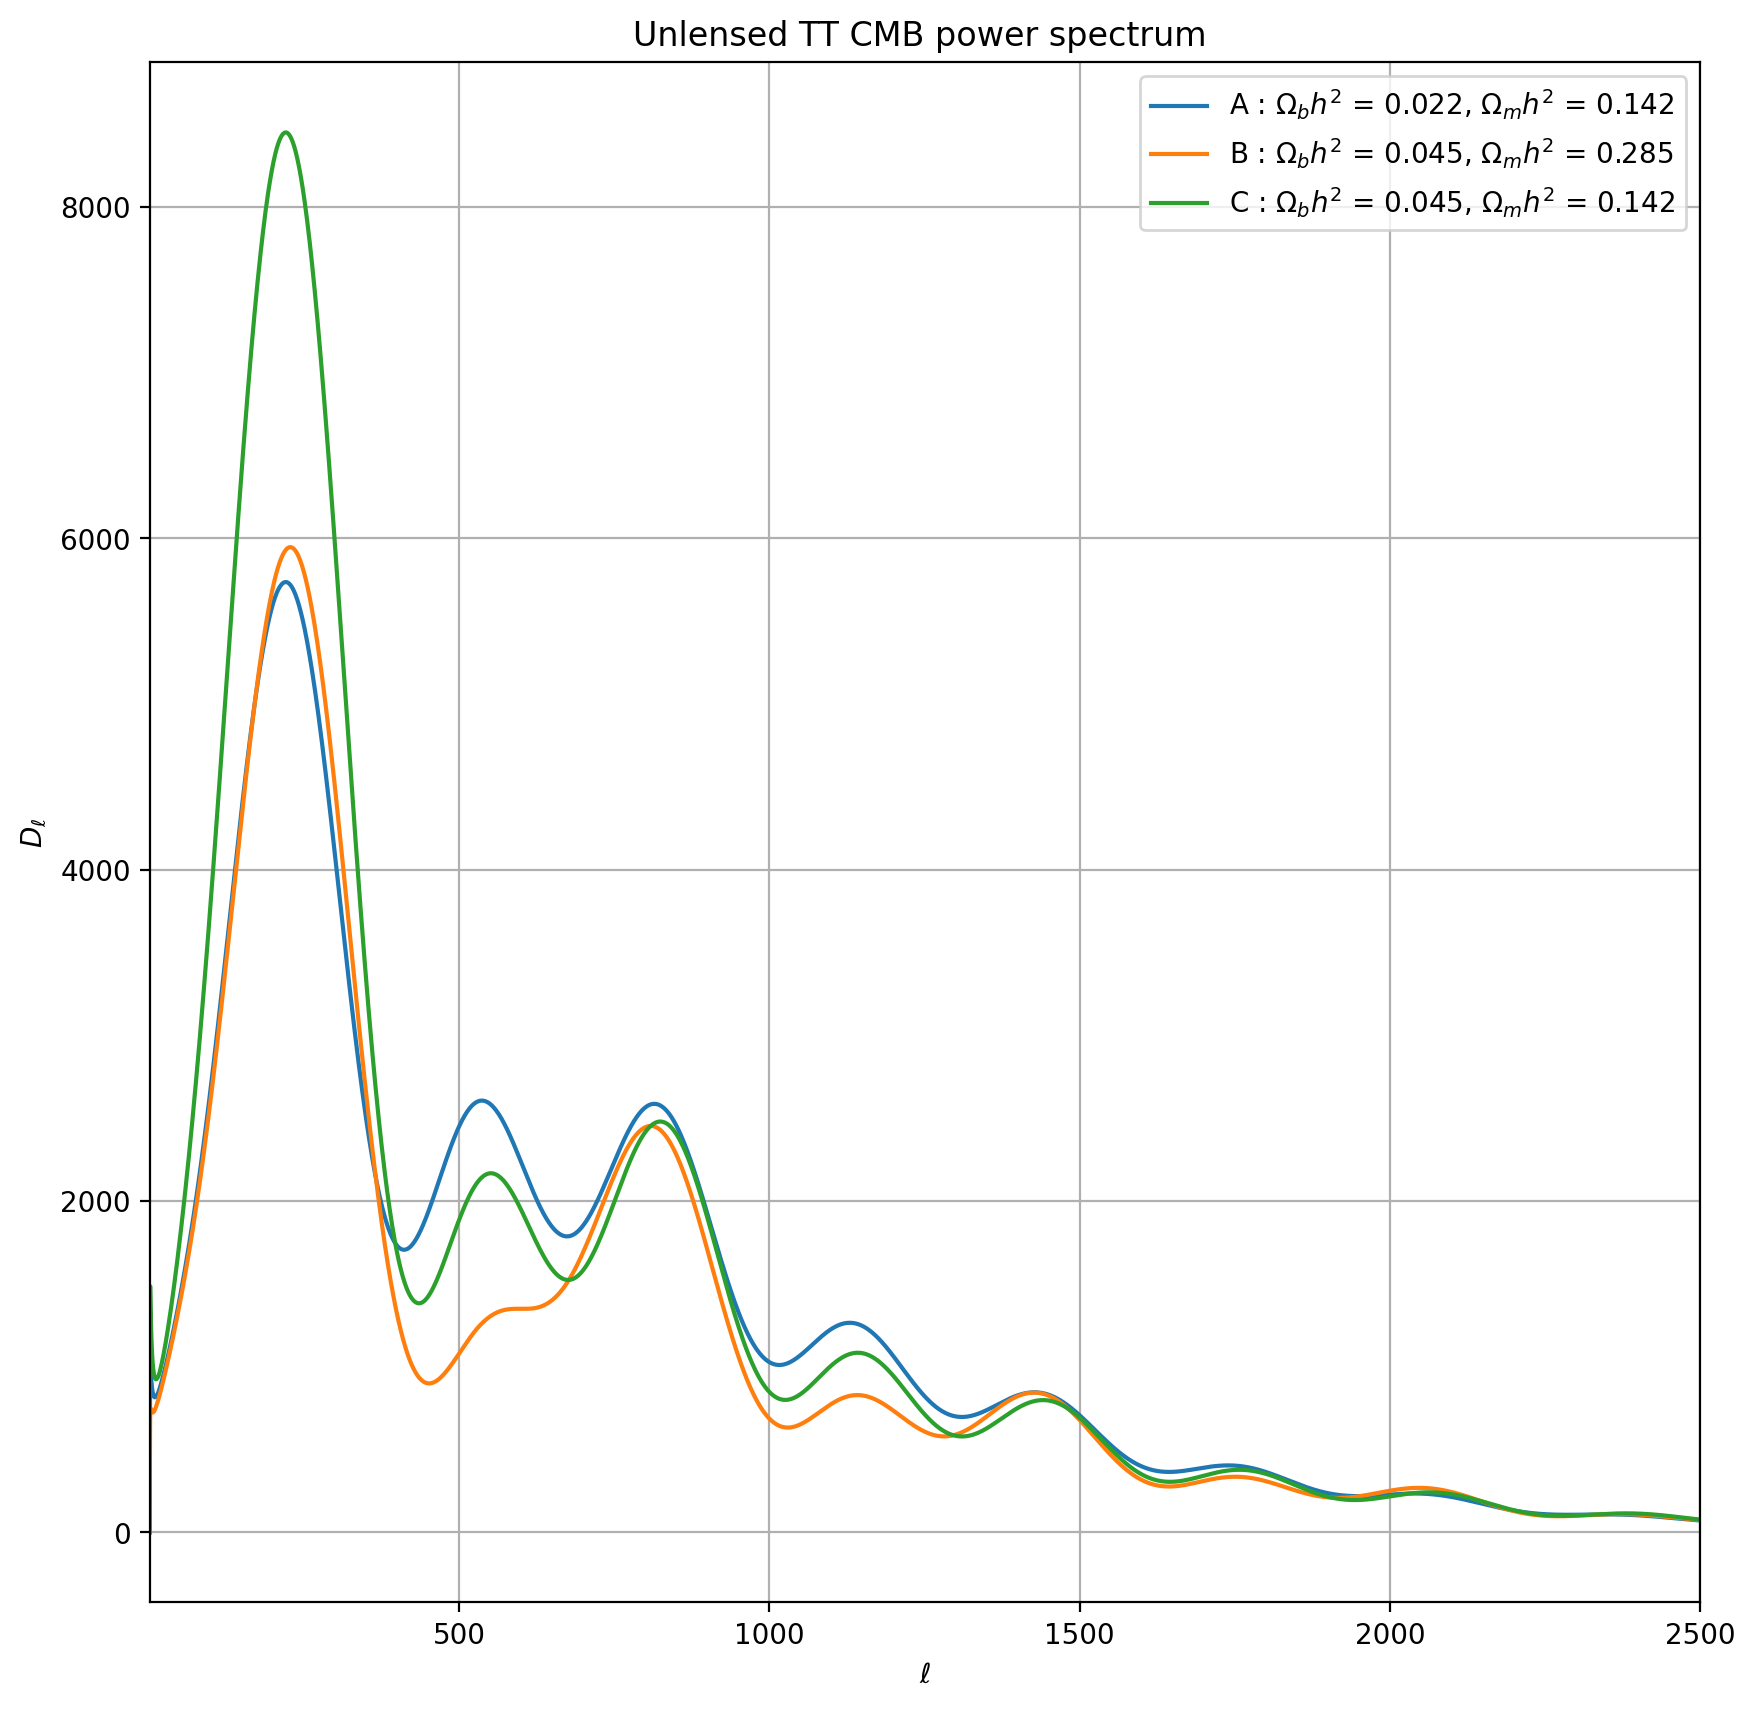

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
results = {}
for c in cosmo_list:
    pars[c].set_for_lmax(2500, lens_potential_accuracy=0)
    results[c] = camb.get_results(pars[c])
    powers = results[c].get_cmb_power_spectra(pars[c], CMB_unit="muK")
    unlensed = powers["unlensed_scalar"]
    ls = np.arange(unlensed.shape[0])
    ax.plot(ls, unlensed[:, 0], label=labels[c])
ax.legend()
ax.set_xlabel(r"$\ell$")
ax.set_ylabel(r"$D_\ell$")
ax.set_title("Unlensed TT CMB power spectrum ")
ax.set_xlim(2, 2500)
ax.grid(True)

Sanity Check Assert that the cosmology matches except for the parameters we are varying

In [8]:
# assert that there is no curvature
sources = ["cdm", "baryon", "photon", "neutrino", "nu", "de"]
Om = {}
for c in cosmo_list:
    Om[c] = [results[c].get_Omega(s) for s in sources]

print("Om_x \t A \t\t B \t\t C")
for s in sources:
    print(
        f"{s[:3]} \t {Om['A'][sources.index(s)]:0.4f} \t {Om['B'][sources.index(s)]:0.4f} \t {Om['C'][sources.index(s)]:0.4f}"
    )
print(
    f"K \t {results['A'].get_Omega('K'):0.4f} \t {results['B'].get_Omega('K'):0.4f} \t {results['C'].get_Omega('K'):0.4f}"
)
print(
    f"Total \t {np.sum(Om['A']):0.4f} \t {np.sum(Om['B']):0.4f} \t {np.sum(Om['C']):0.4f}"
)
# calculate the total matter density
Om_m = {}
for c in cosmo_list:
    Om_m[c] = (
        results[c].get_Omega("cdm")
        + results[c].get_Omega("baryon")
        + results[c].get_Omega("nu")
    )
print(f"Matr \t {Om_m['A']:0.4f} \t {Om_m['B']:0.4f} \t {Om_m['C']:0.4f}")

Om_x 	 A 		 B 		 C
cdm 	 0.2651 	 0.6330 	 0.1055
bar 	 0.0494 	 0.1180 	 0.0483
pho 	 0.0001 	 0.0001 	 0.0000
neu 	 0.0000 	 0.0000 	 0.0000
nu 	 0.0014 	 0.0017 	 0.0007
de 	 0.6840 	 0.2473 	 0.8454
K 	 0.0000 	 0.0000 	 0.0000
Total 	 1.0000 	 1.0000 	 1.0000
Matr 	 0.3159 	 0.7526 	 0.1546


## 2. Plot the CDM fluction amplitude for each model as a function of redshift.

## **Again, note any differences among the models and qualitatively explain the origin of these differences.**

At higher redshifts, the dark matter fluctations are smaller. Since the universe is radiation dominated, the matter fluctions grow logarithmically. After matter-radiation equality, The dark matter starts to grow more rapidly around $z=10^{4}$. Finally, the universe enters dark energy dominated era. At this point, the dark matter ceases to grow. 

When there is double the matter density, the dark matter flucuations are larger. This because the more mass allows for more gravitational collapse. 

When there is less dark matter to baryonic matter, the dark matter flucuations are smaller.  This is because the matter dominated era is shorter and the dark matter has less time to grow.

Text(0.5, 1.0, 'CDM perturbations for 0.1/Mpc')

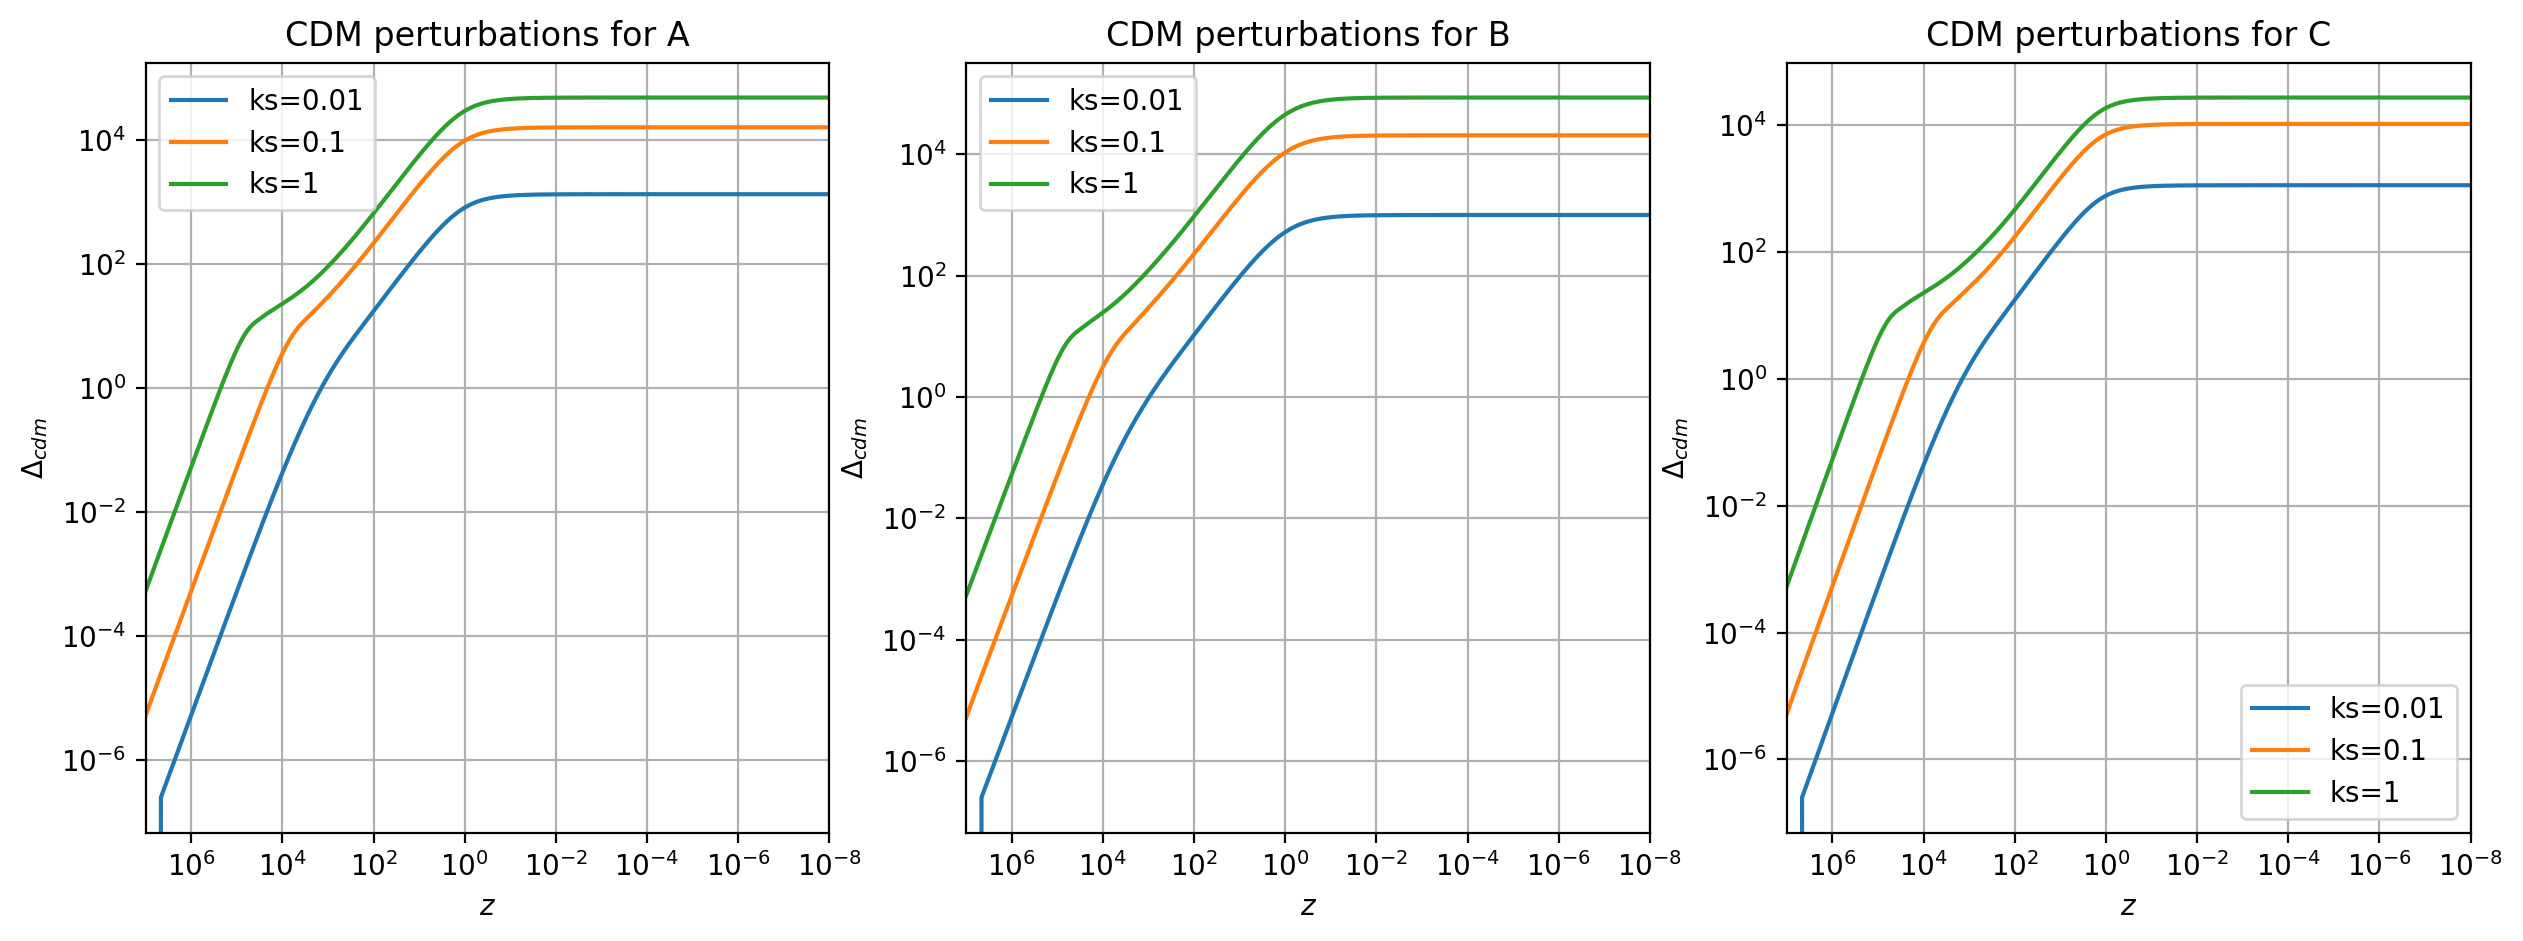

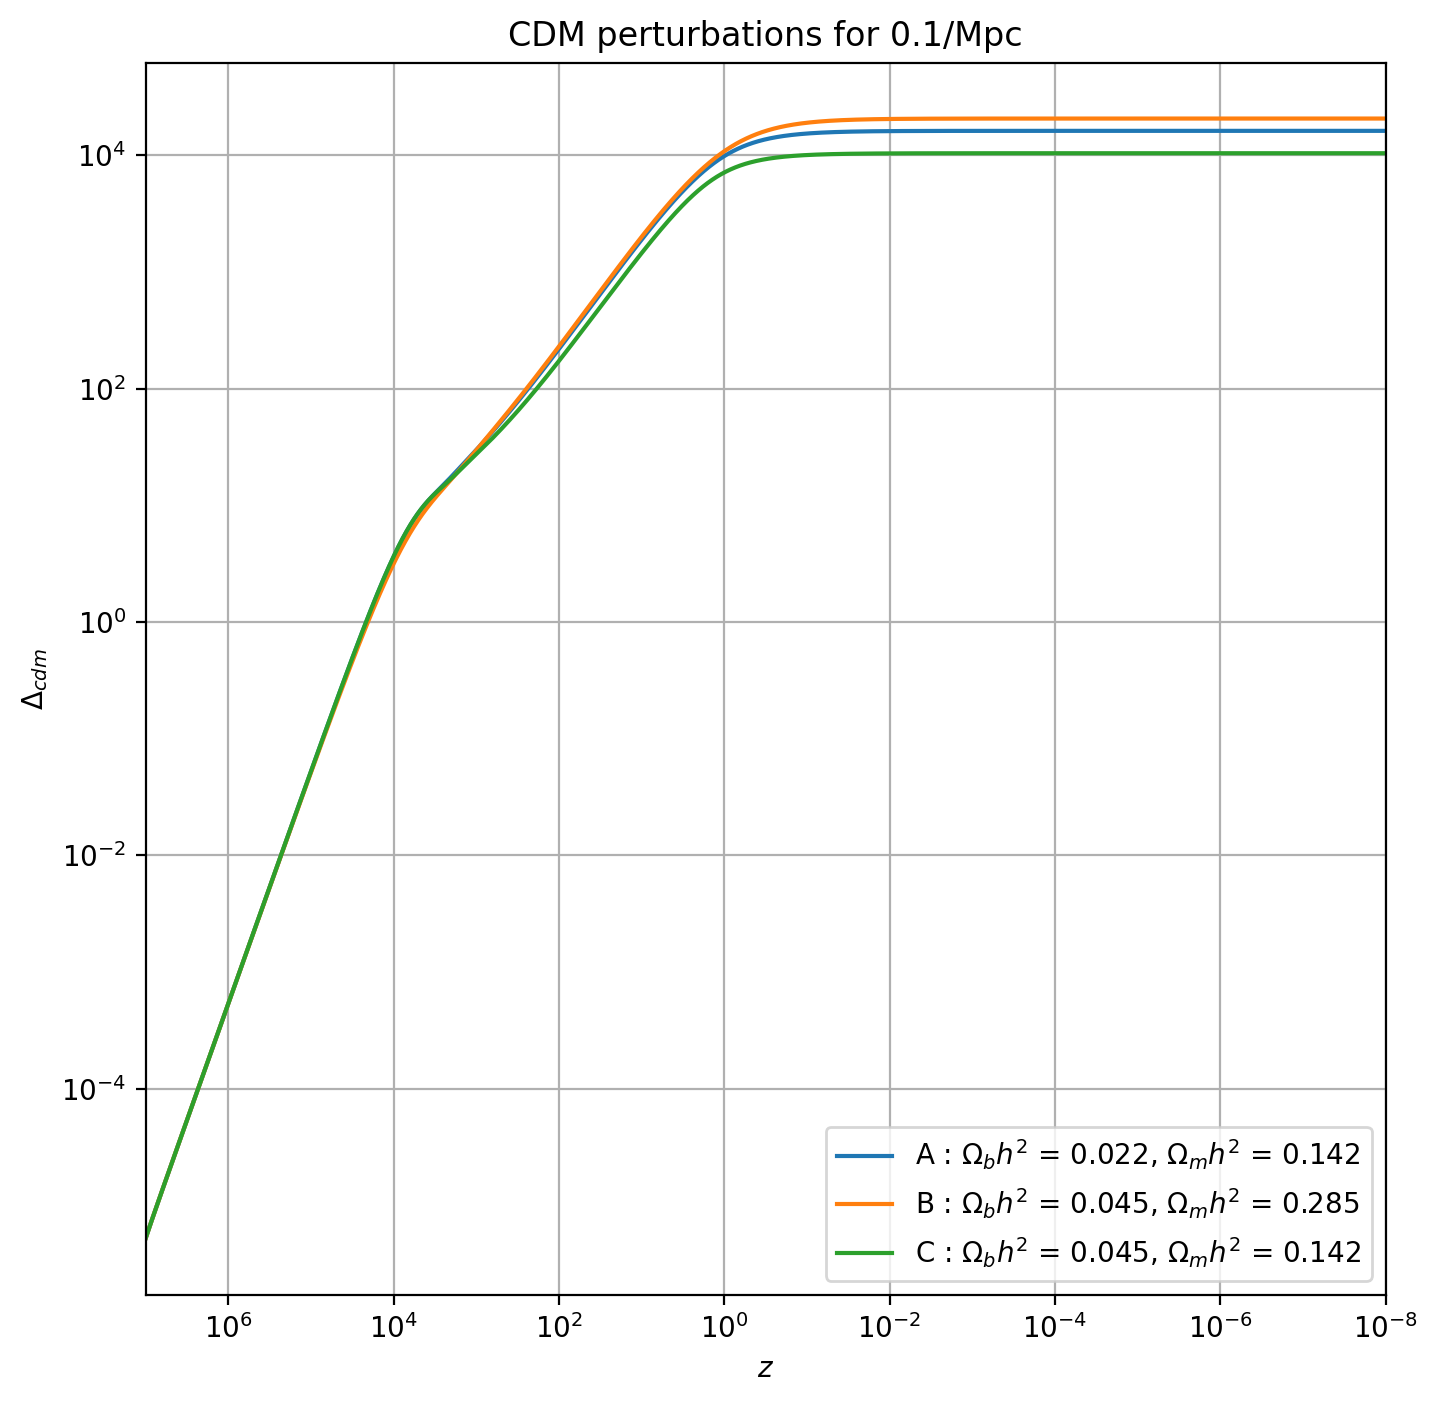

In [9]:
# create redshift array
i = 0
ev = {}
data = {}
ks = [0.01, 0.1, 1]
z = np.logspace(7, -8, 10000)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for c in cosmo_list:
    data[c] = camb.get_background(pars[c])
    # calculate the pertubations as a function of redshift
    ev[c] = data[c].get_redshift_evolution(ks, z, "delta_cdm")
    # plot
    ax[i].loglog(z, ev[c][0, :, 0], label=f"ks={ks[0]}")
    ax[i].loglog(z, ev[c][1, :, 0], label=f"ks={ks[1]}")
    ax[i].loglog(z, ev[c][2, :, 0], label=f"ks={ks[2]}")

    ax[i].legend()
    ax[i].grid(True)
    ax[i].set_xlabel(r"$z$")
    ax[i].set_ylabel(r"$\Delta_{cdm}$")
    ax[i].set_title(f"CDM perturbations for {c}")
    ax[i].set_xlim(1e7, 1e-8)

    i += 1


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
for c in cosmo_list:
    ax.loglog(z, ev[c][1, :, 0], label=labels[c])

ax.legend()
ax.grid(True)
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\Delta_{cdm}$")
ax.set_xlim(1e7, 1e-8)
ax.set_title(f"CDM perturbations for {ks[1]}/Mpc")

In [120]:
# # Resetting the cosmology to the original values   and set redshifts and kmax
pars = {}
pars["A"] = camb.CAMBparams()
pars["A"].set_cosmology(
    H0=None,
    ombh2=Omega_bh2,
    omch2=Omega_ch2,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["A"].InitPower.set_params(As=As, ns=ns, r=0)
pars["A"].set_matter_power(redshifts=[0.0], kmax=2.0)

pars["B"] = camb.CAMBparams()
pars["B"].set_cosmology(
    H0=None,
    ombh2=2 * Omega_bh2,
    omch2=2 * Omega_ch2,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["B"].InitPower.set_params(As=As, ns=ns, r=0)
pars["B"].set_matter_power(redshifts=[0.0], kmax=2.0)

pars["C"] = camb.CAMBparams()
pars["C"].set_cosmology(
    H0=None,
    ombh2=Omega_bh2_C,
    omch2=Omega_ch2_C,
    cosmomc_theta=theta_MC,
    omk=0,
    tau=tau,
)
pars["C"].InitPower.set_params(As=As, ns=ns, r=0)
pars["C"].set_matter_power(redshifts=[0.0], kmax=2.0)
# noqa

## 3. Linear Power Spectrum and Dimensionless Power Spectrum
### **Would it be straightforward to differentiate between these three models on the basis of P(k)?**
Yes, the linear matter power spectrum varies greatly in these three models. If we were in Universe B, we would expect to a power spectrum that peaks around $k=0.05 h/Mpc$. This peak would be smaller than the peak in Universe A, so we could differentiate by CMB Observations and galaxy clustering. Similarly, Universe C would peak at at smaller waver number than Universe A, and the peak would be larger. We could differentiate by the same methods to rule out Universe B.

Text(0.5, 1.0, 'Dimensionles Linear Matter Power Spectrum for z = 0.0')

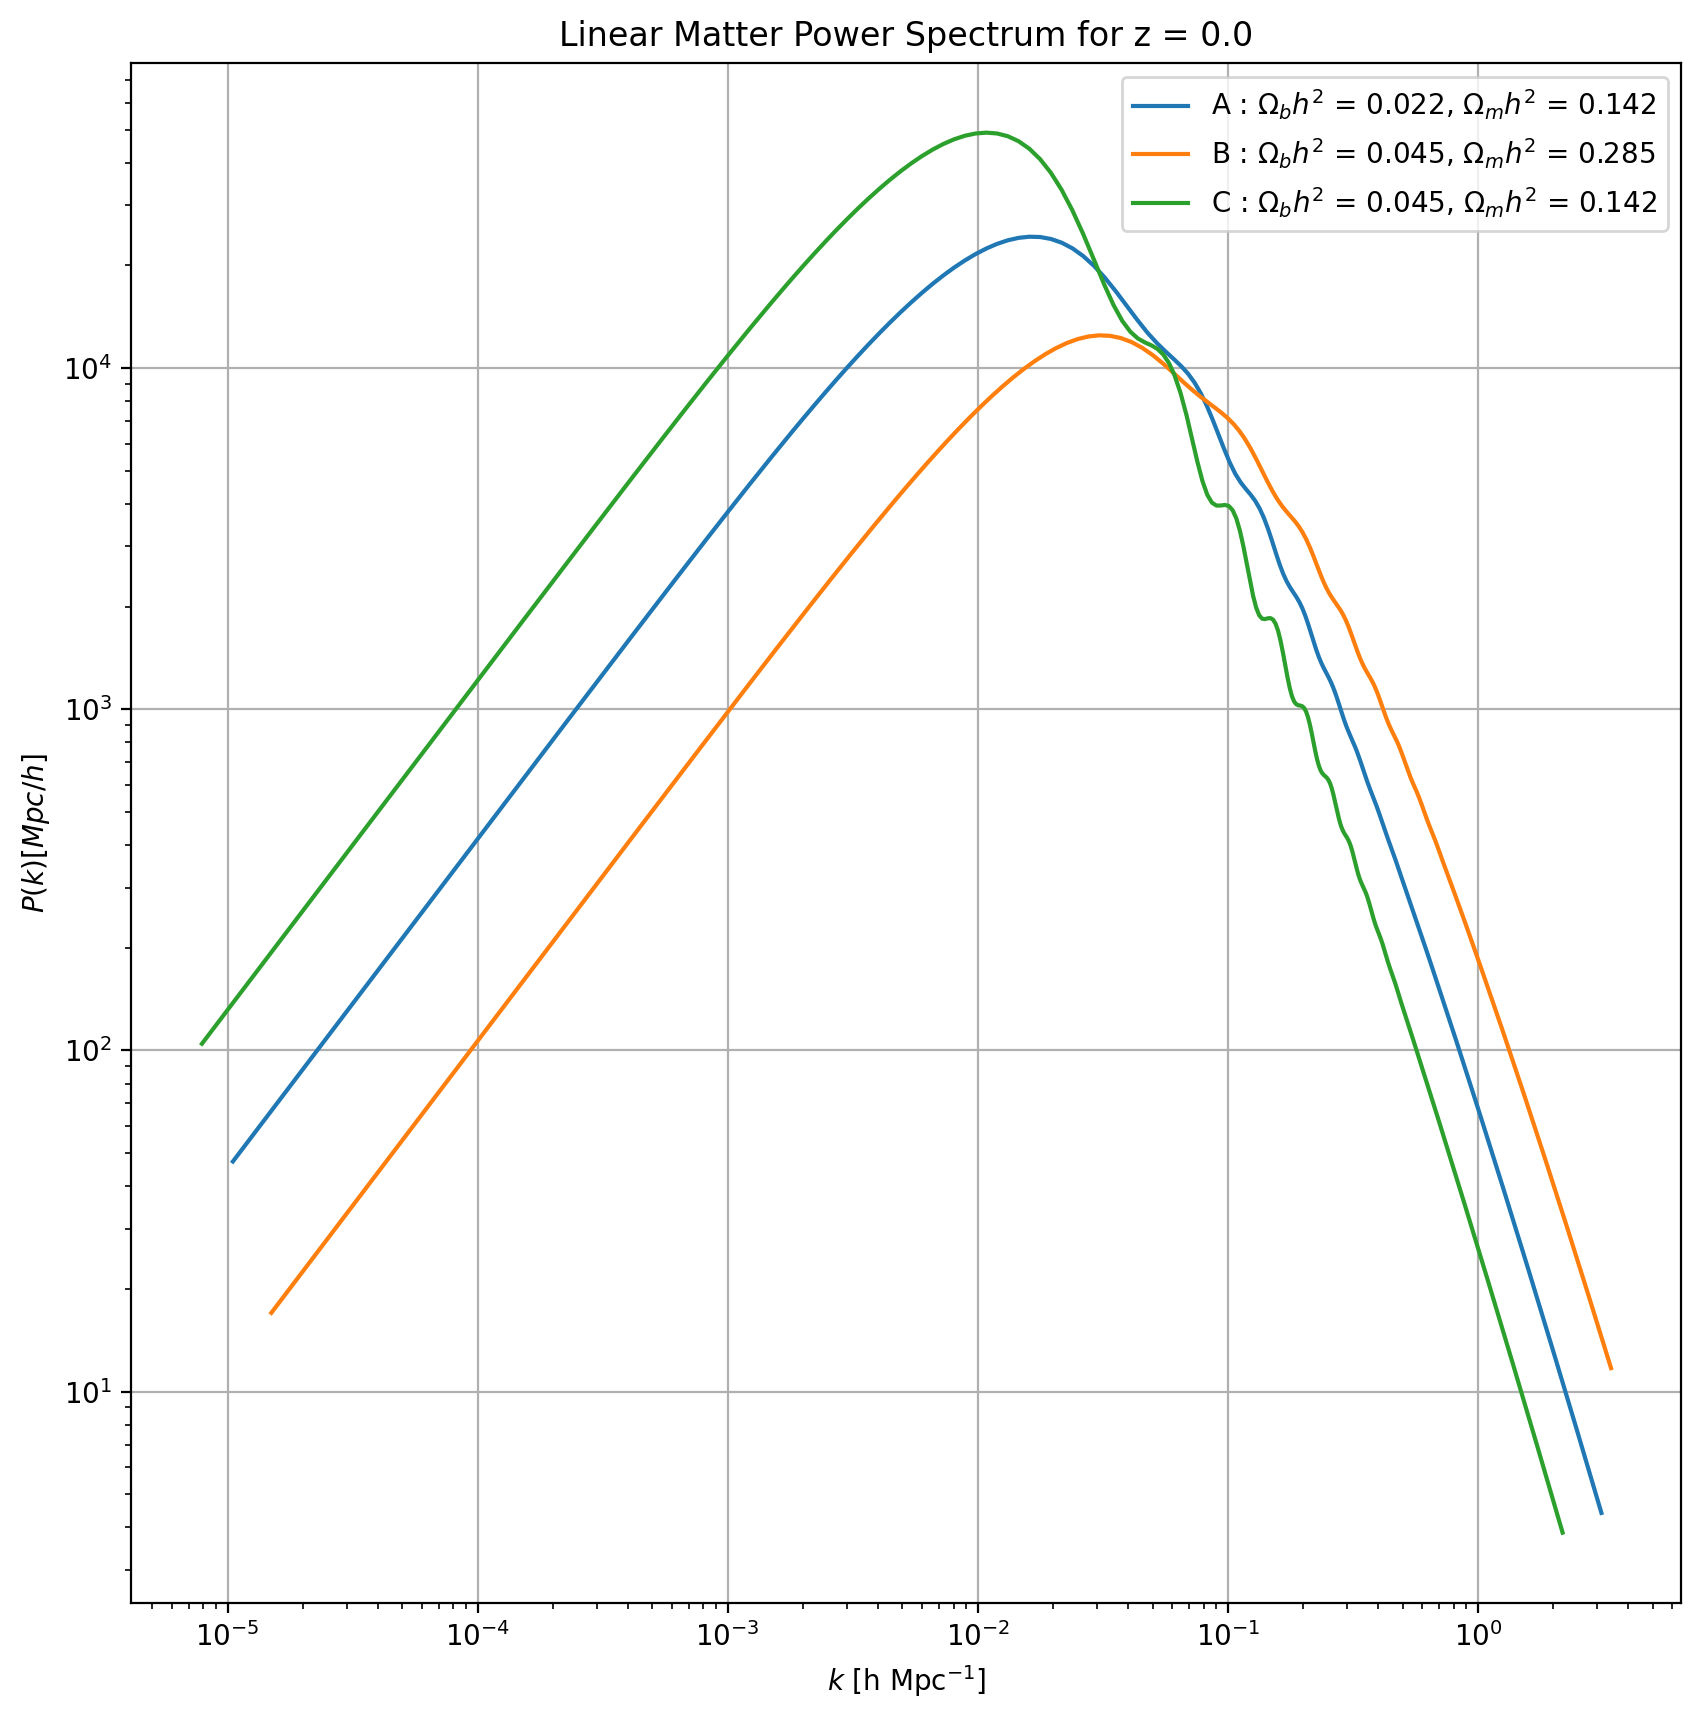

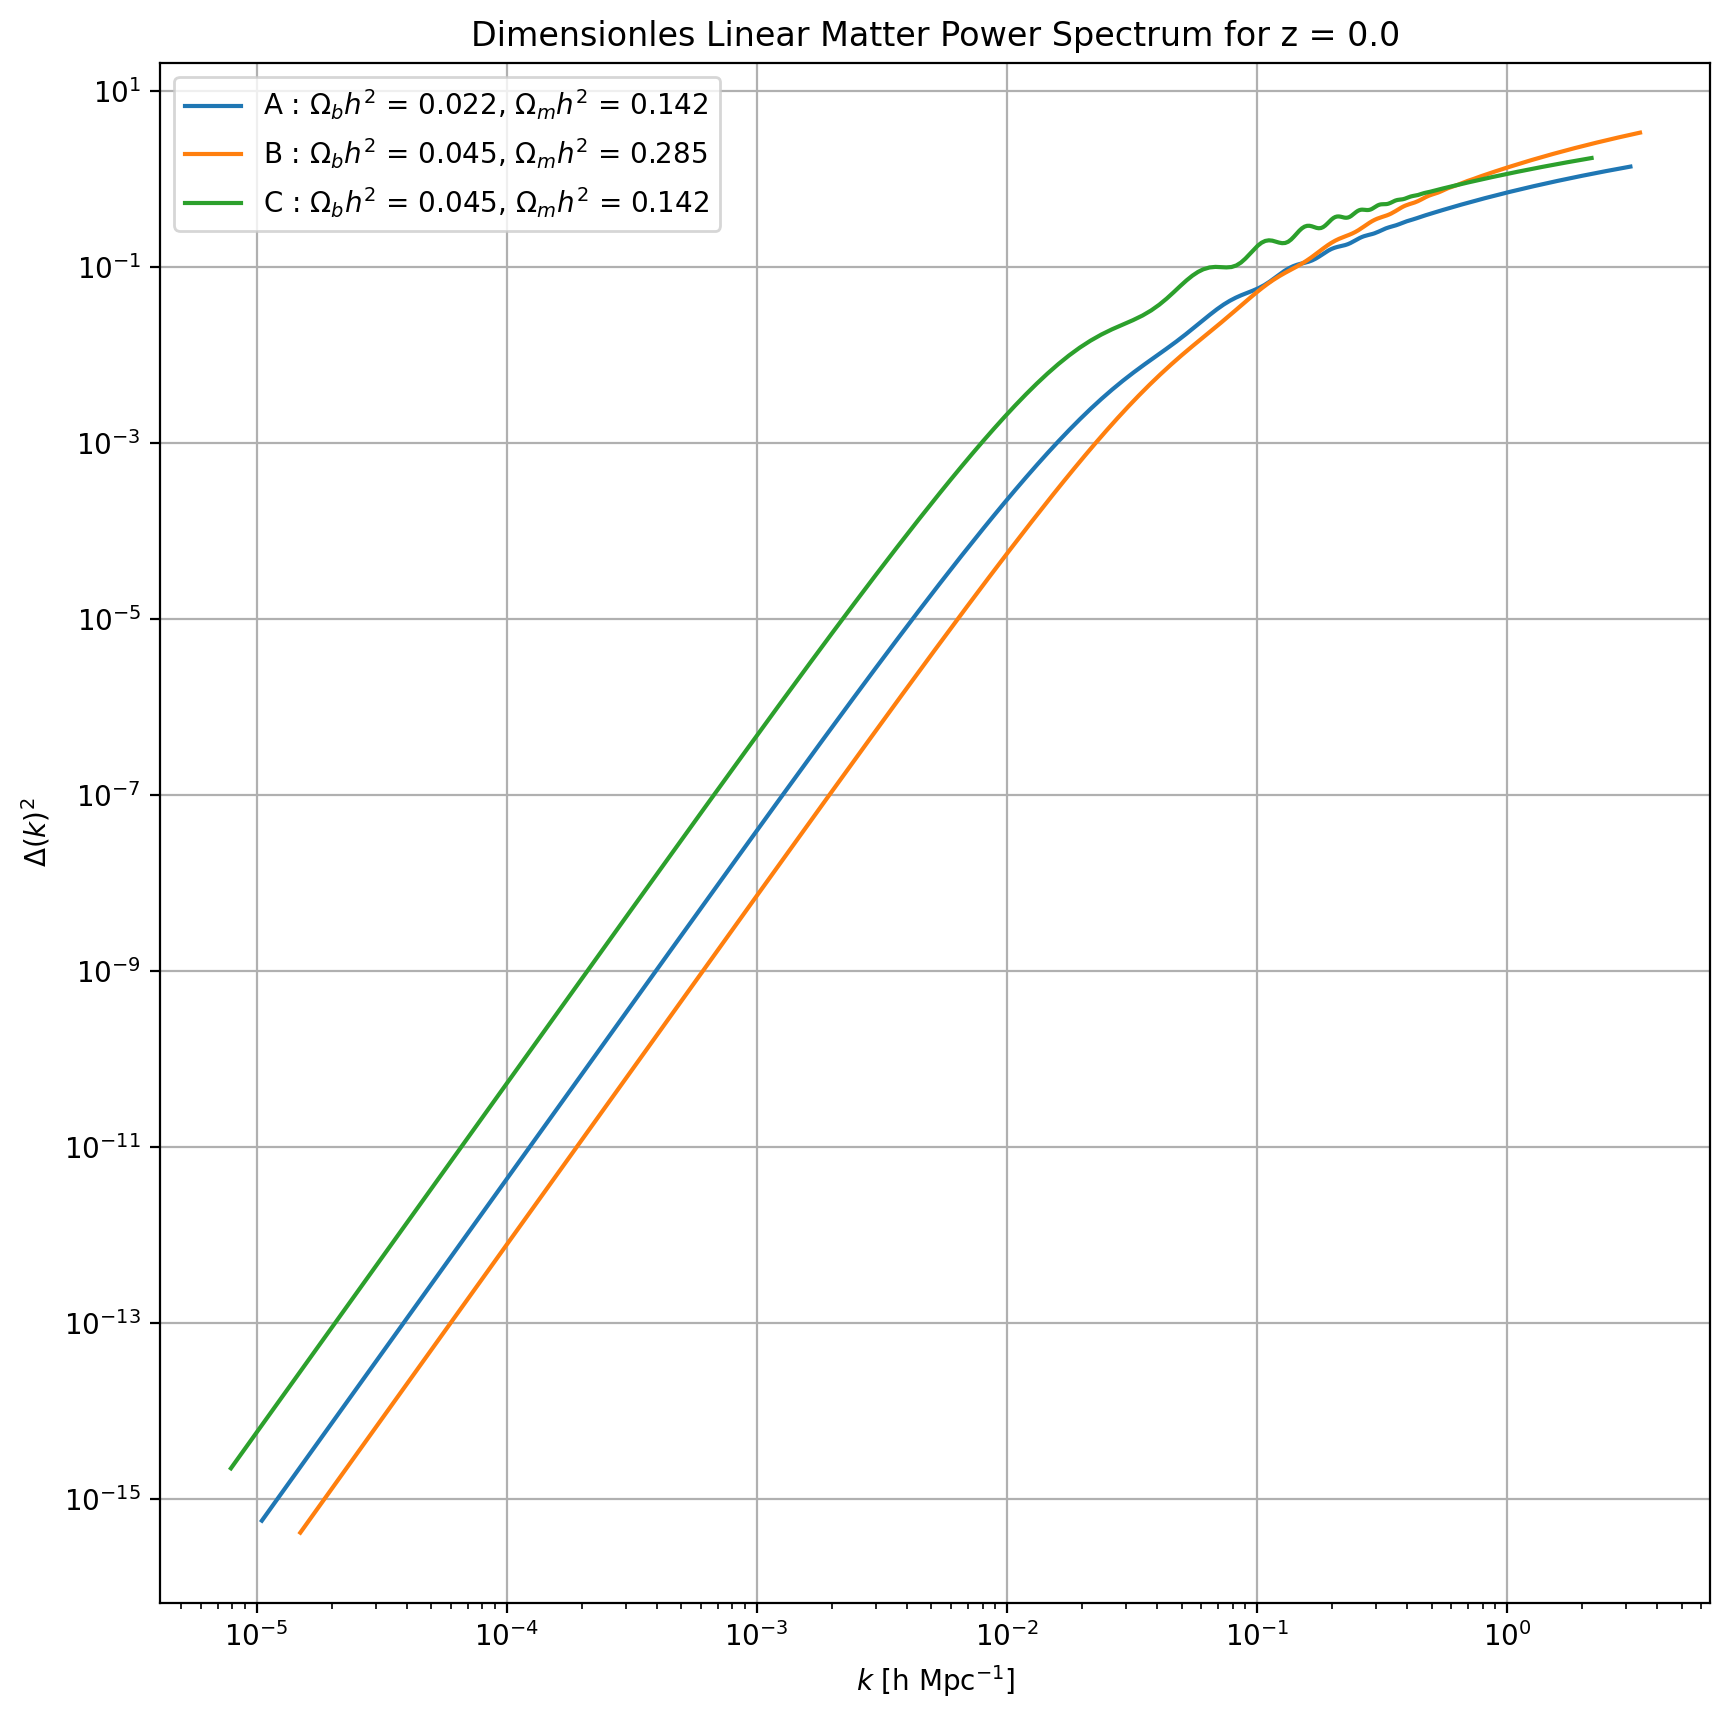

In [140]:
# restart CAMB with the new parameters
h = {}
kh = {}

pk = {}
DeltaK = {}
results = {}
PK_interp = {}

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig, ax2 = plt.subplots(1, 1, figsize=(10, 10))
# calculate the power spectra for each cosmology
for c in cosmo_list:
    # set the non-linear model
    pars[c].NonLinear = model.NonLinear_none
    results[c] = camb.get_results(pars[c])
    # calculate the power spectra
    kh[c], z, pk[c] = results[c].get_linear_matter_power_spectrum()
    PK_interp[c] = results[c].get_matter_power_interpolator(
        nonlinear=False, log_interp=True
    )
    pk[c] = pk[c][0, :]
    # get the lil h
    h[c] = results[c].Params.H0 / 100
    # normalize the power spectrum
    DeltaK[c] = pk[c] * h[c] * (kh[c] * h[c]) ** 3 / (2 * np.pi**2)
    # plot the results
    ax.loglog(kh[c], pk[c], label=labels[c])
    ax2.loglog(kh[c], DeltaK[c], label=labels[c])

ax.legend()
ax.grid(True)
ax.set_xlabel(r"$k$ [h Mpc$^{-1}$]")
ax.set_ylabel(r"$P(k) [Mpc/h]$")
ax.set_title("Linear Matter Power Spectrum for z = 0.0")
ax2.legend()
ax2.grid(True)
ax2.set_xlabel(r"$k$ [h Mpc$^{-1}$]")
ax2.set_ylabel(r"$\Delta(k)^2$")
ax2.set_title("Dimensionles Linear Matter Power Spectrum for z = 0.0")

## 4. Compute RMS Flucuation Amplitude
To evaluate the RMS flucuation amplitude, we use the following equation:

$$ \sigma(M)^2 = \int_0^{\infty} \Delta^2(k) W_R^2(kR) d \ln(k)$$

Where $W_R(kR) = \frac{3}{(kR)^3} ( \sin(kR) - kR \cos(kR)) $

In [159]:
# define the mass range
M = np.logspace(6, 20, 100)
G = 4.302 * 10 ** (-9)  # Mpc M_sun^-1 (km/s)^2
# calculate the Hubble Rate at z = 0
H = {}
R = {}
Om_M = {}
rho_c0 = {}

for c in cosmo_list:
    H[c] = results[c].hubble_parameter(0)
    print(f"Hubble rate for {c} is {H[c]:0.4f}")
    Om_M[c] = (
        results[c].get_Omega("cdm", 0.0)
        + results[c].get_Omega("baryon", 0.0)
        + results[c].get_Omega("nu", 0.0)
    )
    rho_c0[c] = 3 * H[c] ** 2 / (8 * np.pi * G)
    R[c] = (3 * M / (4 * np.pi * Om_M[c] * rho_c0[c])) ** (1 / 3)

Hubble rate for A is 67.3084
Hubble rate for B is 61.6055
Hubble rate for C is 96.2367


In [165]:
def W_R(k, R):
    return 3 * (np.sin(k * R) - k * R * np.cos(k * R)) / (R * k) ** 3


def sigma(k, D, h, kh_vec, R):
    k = np.exp(k)
    kh = k / h
    # linearly interpolate the power spectrum
    D_k = np.interp(kh, kh_vec, D) * h * (k) ** 3 / (2 * np.pi**2)
    # compute sigma from R
    return D_k * W_R(kh, R) ** 2

### Below I am calculating the RMS flucuation amplitude with the linear power spectrum

In [166]:
# numerically integrate sigma
sigma_num = {}
# R_lin = np.linspace(10**-2, 10**5, 1000)
M_lin = {}
for c in cosmo_list:
    sigma_num[c] = np.zeros(len(R[c]))
    a = np.log(kh[c].min() * h[c])
    b = np.log(kh[c].max() * h[c])
    for i in range(len(R[c])):
        sigma_num[c][i] = integrate.quad(
            sigma,
            a,
            b,
            args=(pk[c], h[c], kh[c], R[c][i]),
        )[0]

        M_lin[c] = 4 * np.pi * R[c] ** 3 * Om_M[c] * rho_c0[c] / 3

/tmp/ipykernel_3707007/2036202656.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sigma_num[c][i] = integrate.quad(


Text(0.5, 1.0, 'Mass variance for z = 0.0')

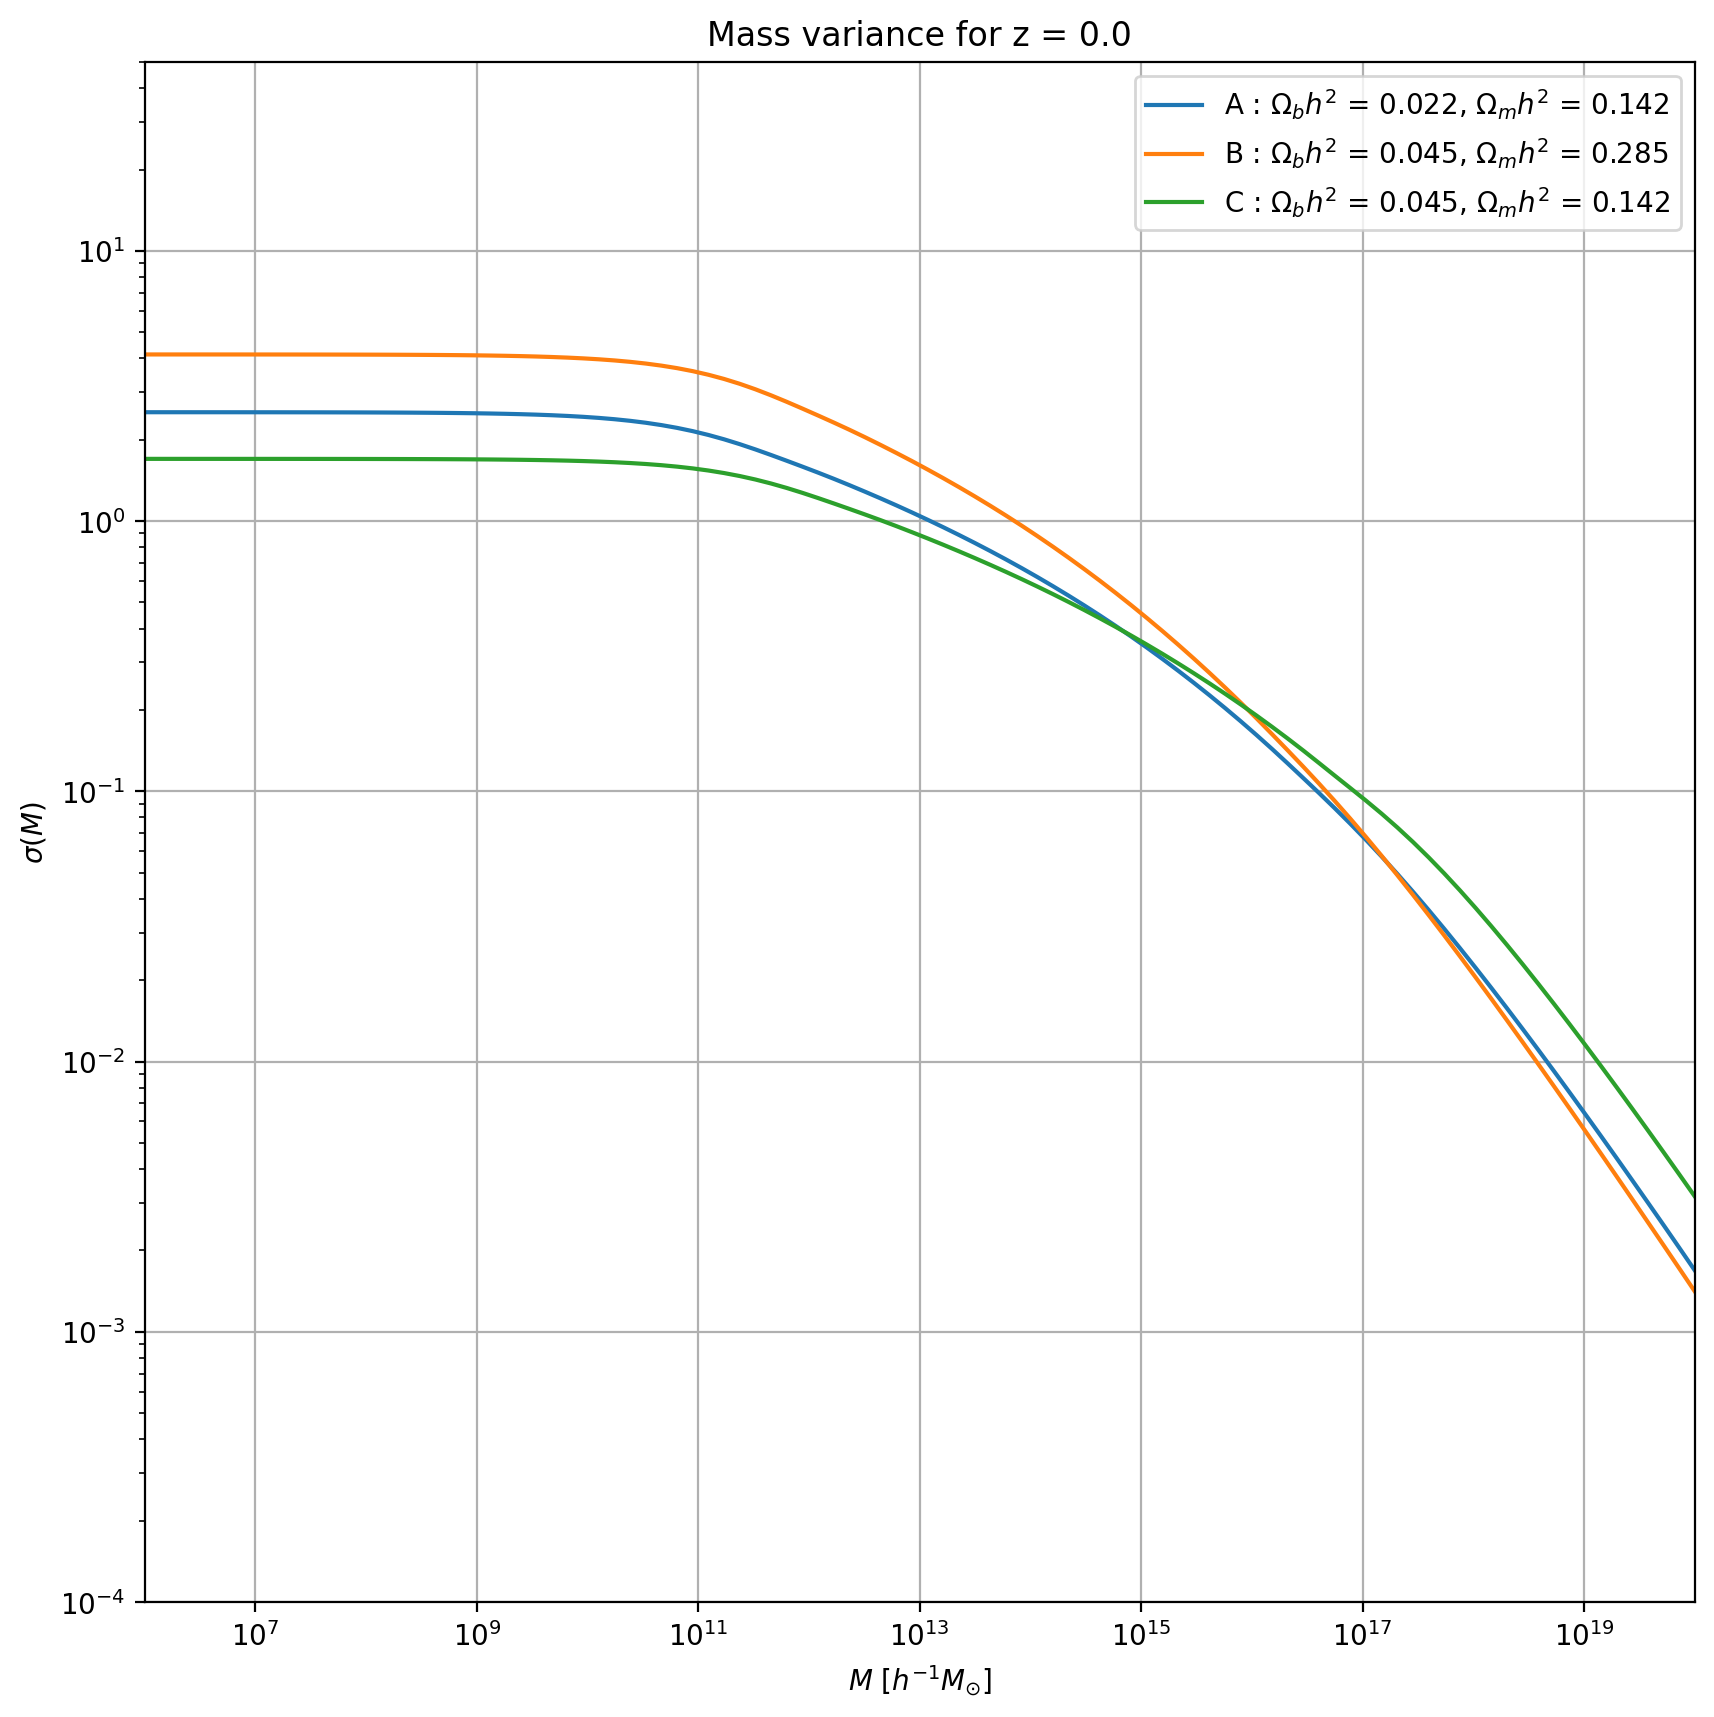

In [167]:
# plot the sigma vers mass
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for c in cosmo_list:
    ax.loglog(M_lin[c], np.sqrt(sigma_num[c] / h[c] ** 3), label=labels[c])
ax.legend()
ax.grid(True)
ax.set_xlim(1e6, 1e20)
ax.set_ylim(1e-4, 5e1)

ax.set_xlabel(r"$M$ [$h^{-1} M_{\odot}$]")
ax.set_ylabel(r"$\sigma(M)$")
ax.set_title("Mass variance for z = 0.0")

Use camb as sanity check

Text(0.5, 1.0, 'Mass variance for z = 0.0')

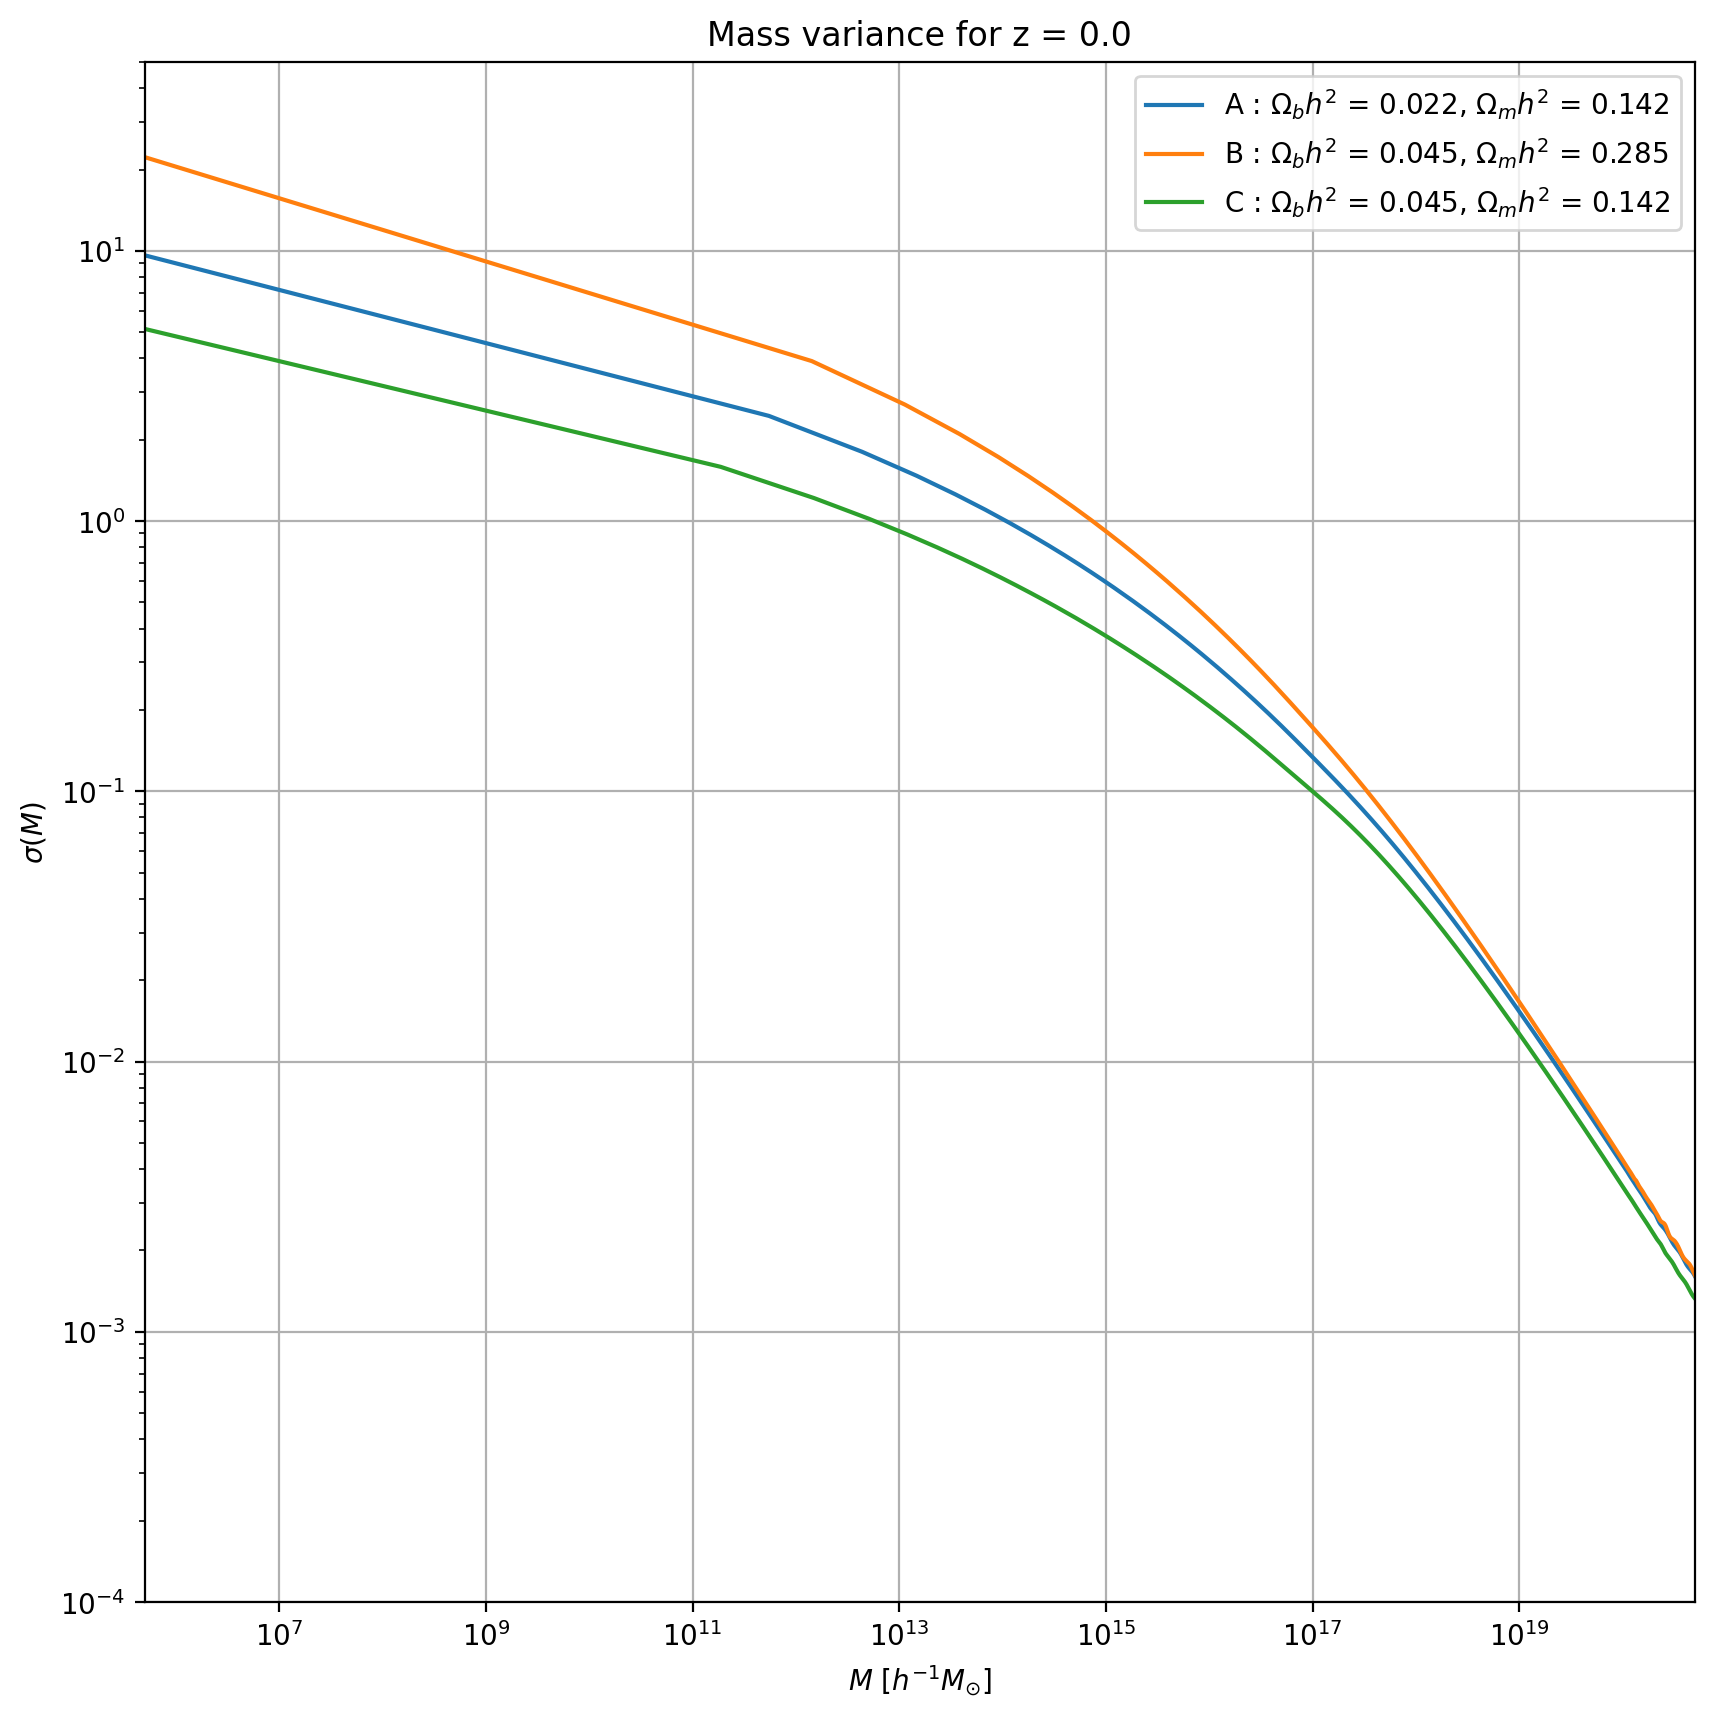

In [14]:
# get the mass variance
sig = {}
radius = {}
redshift = {}

r_lin = np.linspace(0.001, 10000, 10000)
R_lin = {}
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for c in cosmo_list:
    R_lin[c], _, sig[c] = results[c].get_sigmaR(
        r_lin, hubble_units=True, return_R_z=True
    )
    M = (4 * np.pi * R_lin[c] ** 3 / 3) * rho_c0[c] * Om_M[c]

    ax.loglog(M, sig[c][0, :], label=labels[c])

ax.legend()
ax.grid(True)
ax.set_xlim(5e5, 5e20)
ax.set_ylim(1e-4, 5e1)
ax.set_xlabel(r"$M$ [$h^{-1} M_{\odot}$]")
ax.set_ylabel(r"$\sigma(M)$")
ax.set_title("Mass variance for z = 0.0")